## 4.การวิเคราะห์ข้อมูล

- ค่าที่เกินมาตรฐาน
- ความสัมพันธ์ของข้อมูล

โดยมาตรฐานของ WHO แล้ว ค่ามลพิษไม่ควรเกินดังนี้  

![Recommended 2021 AQG levels compared to 2005 air quality guidelines](https://www.who.int/images/default-source/air-pollution/air-quality-and-health/pollutants_2005_2021_new.jpg?sfvrsn=5c76524d_7&Status=Master)  

โดยค่าของ NO<sub>2</sub> จะถูกแปลงเป็นหน่วย ppm :  
$$
  \frac{\frac{10}{1000}}{0.0409\times(16\times3)} \approx 0.005094
$$

### หาว่ามีกี่สถานี ที่มีค่าสภาพอากาศเกินมาตรฐาน

In [33]:
import pandas as pd
data_daily = pd.read_csv("../data/data_hourly_clean_daily.csv")
data_daily["datetime"] = pd.to_datetime(data_daily["datetime"])
data_year = data_daily.groupby([pd.Grouper(freq="Y", key="datetime"), "station_id"], dropna=True).mean()
list_index = data_year.index.to_list()

In [34]:
prev_year = "2010"
count_all_station = 0
count_PM25 = 0
count_PM10 = 0
count_NO2 = 0
list_PM25 = []
list_PM10 = []
list_NO2 = []
pre_count_all_s = 0

for date_id in list_index:
    y = str(date_id[0])[0:4]
    if y == prev_year:
        count_all_station += 1
        pm2 = data_year.loc[date_id]["PM2.5"]
        pm10 = data_year.loc[date_id]["PM10"]
        no2 = data_year.loc[date_id]["NO2"]
        if pm2 > 5:
            count_PM25 += 1
        if pm10 > 15:
            count_PM10 += 1
        if no2 > 0.005094:
            count_NO2 += 1
    else:
        #print(prev_year + " : " + "PM2.5 = " + str(count_PM25 / count_all_station))
        #print(prev_year + " : " + "PM10 = " + str(count_PM10 / count_all_station))
        list_PM25.append(count_PM25 / count_all_station)
        list_PM10.append(count_PM10 / count_all_station)
        list_NO2.append(count_NO2 / count_all_station)
        prev_year = y
        count_all_station = 1
        count_PM25 = 0
        count_PM10 = 0
        count_NO2 = 0
        #print(year.loc[date_id])
        pm2 = data_year.loc[date_id]["PM2.5"]
        pm10 = data_year.loc[date_id]["PM10"]
        no2 = data_year.loc[date_id]["NO2"]
        if pm2 > 5:
            count_PM25 += 1
        if pm10 > 15:
            count_PM10 += 1
        if no2 > 0.005094:
            count_NO2 += 1

over_standard = {"PM2.5" : list_PM25, "PM10" : list_PM10, "NO2" : list_NO2}
over_standard = pd.DataFrame(over_standard, index=(range(2010,2022)))
over_standard

,PM2.5,PM10,NO2
2010,1.0,1.0,1.000000
2011,1.0,1.0,1.000000
2012,1.0,1.0,1.000000
2013,1.0,1.0,1.000000
2014,1.0,1.0,1.000000
2015,1.0,1.0,0.984127
2016,1.0,1.0,0.985507
2017,1.0,1.0,0.973333
2018,1.0,1.0,0.974359
2019,1.0,1.0,0.987179


### หาค่า correlation ของแต่ละ column

In [35]:
import seaborn as sns
from matplotlib import pyplot as plt

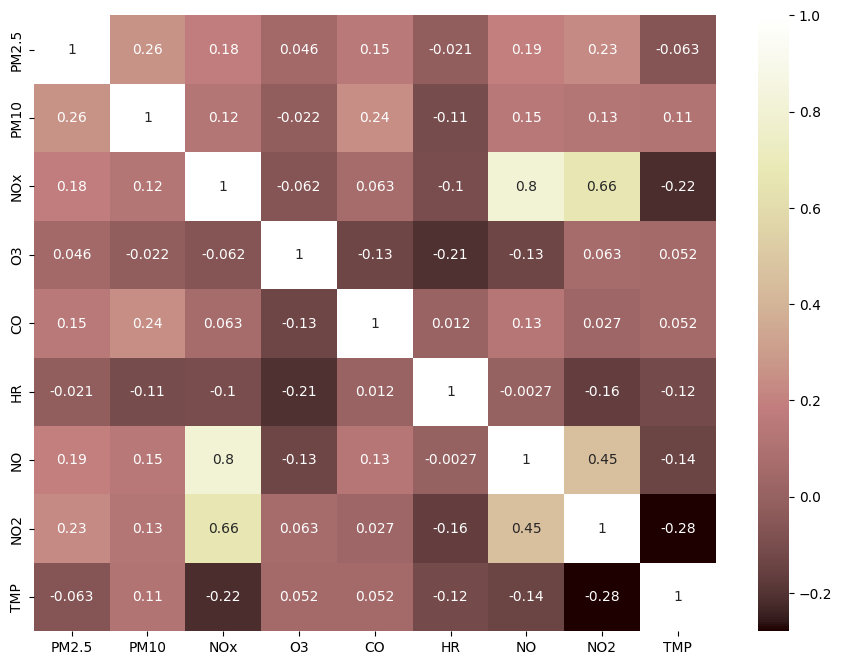

In [36]:
# Select the columns you want to include in the correlation analysis
selected_columns = data_daily[['PM2.5', 'PM10', 'NOx', 'O3', 'CO', 'HR', 'NO', 'NO2', 'TMP']]
# Calculate the correlation matrix
corr = selected_columns.corr()
# Create a heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="pink", annot=True)
plt.show()

### max min avg ของค่าแต่ละปี 

In [59]:
min_pm25 = data_year.min()["PM2.5"]
min_pm10 = data_year.min()["PM10"]
min_no2 = data_year.min()["NO2"]
max_pm25 = data_year.max()["PM2.5"]
max_pm10 = data_year.max()["PM10"]
max_no2 = data_year.max()["NO2"]
avg_pm25 = data_year.mean()["PM2.5"]
avg_pm10 = data_year.mean()["PM10"]
avg_no2 = data_year.mean()["NO2"]
print("=== PM2.5 ===")
print("min : " + str(min_pm25) + " ( year : " + str(data_year.loc[data_year["PM2.5"] == min_pm25].index.values[0][0])[0:4] + " )")
print("max : " + str(max_pm25) + " ( year : " + str(data_year.loc[data_year["PM2.5"] == max_pm25].index.values[0][0])[0:4] + " )")
print("avg : " + str(min_pm25) + "( all year )")
print("=== PM10 ===")
print("min : " + str(min_pm10) + " ( year : " + str(data_year.loc[data_year["PM10"] == min_pm10].index.values[0][0])[0:4] + " )")
print("max : " + str(max_pm10) + " ( year : " + str(data_year.loc[data_year["PM10"] == max_pm10].index.values[0][0])[0:4] + " )")
print("avg : " + str(min_pm10) + "( all year )")
print("=== NO2 ===")
print("min : " + str(min_no2) + " ( year : " + str(data_year.loc[data_year["NO2"] == min_no2].index.values[0][0])[0:4] + " )")
print("max : " + str(max_no2) + " ( year : " + str(data_year.loc[data_year["NO2"] == max_no2].index.values[0][0])[0:4] + " )")
print("avg : " + str(min_no2) + "( all year )")

=== PM2.5 ===
min : 6.89815 ( year : 2017 )
max : 168.18566001184817 ( year : 2017 )
avg : 6.89815( all year )
=== PM10 ===
min : 16.738454388543108 ( year : 2015 )
max : 304.417487 ( year : 2018 )
avg : 16.738454388543108( all year )
=== NO2 ===
min : 0.0022 ( year : 2018 )
max : 0.0518333333333333 ( year : 2022 )
avg : 0.0022( all year )
